#*1. DATA PREPROCESSING*

## Install and import packages

In [1]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = { 'pandas','numpy', 'matplotlib', 'seaborn','toad','sklearn'}
missing = required - installedPackages
if missing:
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn
    !pip install toad
    
    !pip install sklearn

import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
import glob
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import toad
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 58.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=a55fbabc9f55dc1aff2681b780b744ffedc2c236a08b182f72c0e81520e87347
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built skl

##Load data and check the default label rate

In [2]:
# use pandas to load the csv file
data = pd.read_csv('UCI_Credit_Card.csv')
# check the size of the data
data.shape

(30000, 25)

Content
There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
19. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
# check few lines
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#use the world 'label'
data['label']=data['default.payment.next.month']
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,label
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [5]:
data=data.drop(columns=['default.payment.next.month'])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Proportion of fraud in the data: 22.12%


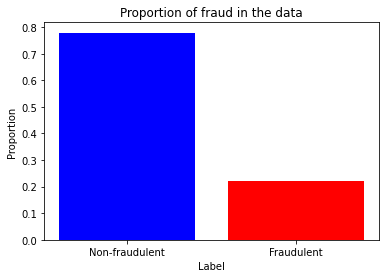

In [6]:
#check the fraud proportion of the data
fraud_proportion = data['label'].value_counts(normalize=True)[1]
print("Proportion of fraud in the data: {:.2%}".format(fraud_proportion))


# Buat diagram batang the fraud proportion of the data
plt.bar(['Non-fraudulent', 'Fraudulent'], [1-fraud_proportion, fraud_proportion], color=['blue', 'red'])
plt.title('Proportion of fraud in the data')
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.show()

##Train & Test Split

In [7]:
# set an exclude list for the scorecard package Toad
exclude_list = ['ID','label']

In [8]:
# use the ID column to split the train-test data
#ID sudah berurutan jadi bisa split menggunakan ID
data.ID.describe()

count    30000.000000
mean     15000.500000
std       8660.398374
min          1.000000
25%       7500.750000
50%      15000.500000
75%      22500.250000
max      30000.000000
Name: ID, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

# membagi data menjadi 75% data train dan 25% data test agar proporsi label nya sama kita gunakan stratify
train, test = train_test_split(data,  test_size=0.25, random_state=42, stratify=data['label'])

In [10]:
train.label.value_counts()

0    17523
1     4977
Name: label, dtype: int64

In [11]:
test.label.value_counts()

0    5841
1    1659
Name: label, dtype: int64

In [12]:
Perc_Train=4977/17523
print(Perc_Train)

Perc_Test=1659/5841
print(Perc_Test)

#Proporsi label di data train dan test sudah sama 28.40% 

0.2840267077555213
0.2840267077555213


#*2. FEATURE FILTERING*

In [13]:
toad.detect(train)
# Toad: library Python yang digunakan untuk melakukan pre-processing data.
# melakukan pre-processing, seperti data cleaning, data transformation, dan feature selection

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
ID,int64,22500,0.00%,22500,14969.117733,8643.377831,1.0,297.99,3004.8,14974.0,22404.50,26946.1,29704.02,30000.0
LIMIT_BAL,float64,22500,0.00%,77,167434.755556,129480.129119,10000.0,10000.00,30000.0,140000.0,240000.00,360000.0,500000.00,1000000.0
SEX,int64,22500,0.00%,2,1.604222,0.489028,1.0,1.00,1.0,2.0,2.00,2.0,2.00,2.0
EDUCATION,int64,22500,0.00%,7,1.854800,0.795076,0.0,1.00,1.0,2.0,2.00,3.0,5.00,6.0
MARRIAGE,int64,22500,0.00%,4,1.552044,0.521806,0.0,1.00,1.0,2.0,2.00,2.0,3.00,3.0
AGE,int64,22500,0.00%,55,35.409422,9.176842,21.0,22.00,25.0,34.0,41.00,49.0,60.00,75.0
PAY_0,int64,22500,0.00%,11,-0.016667,1.122141,-2.0,-2.00,-1.0,0.0,0.00,2.0,3.00,8.0
PAY_2,int64,22500,0.00%,11,-0.135378,1.197907,-2.0,-2.00,-2.0,0.0,0.00,2.0,3.00,8.0
PAY_3,int64,22500,0.00%,11,-0.167511,1.192627,-2.0,-2.00,-2.0,0.0,0.00,2.0,3.00,8.0
PAY_4,int64,22500,0.00%,11,-0.222667,1.158731,-2.0,-2.00,-2.0,0.0,0.00,2.0,3.00,8.0


In [14]:
#IV (Information Value) --> melihat korelasi antara feature dengan label semakin tinggi IV semakin baik
#IV = True --> hanya menghitung nilai IV saja
#Note: it is recommended to set “iv_only=True” for large dataset or high-dimensional data.
#karena menghitung semua statistik kualitas data dapat memakan waktu dan sumber daya komputasi yang besar
# dan tidak semua feature memiliki korelasi yg tinggi terhadap label jd tdk efisien 
toad.quality(data,'label',iv_only=True)

,iv,gini,entropy,unique
PAY_0,0.877149,NaN,NaN,11.0
PAY_2,0.548952,NaN,NaN,11.0
PAY_3,0.416045,NaN,NaN,11.0
PAY_4,0.367265,NaN,NaN,11.0
PAY_5,0.340329,NaN,NaN,10.0
PAY_6,0.293814,NaN,NaN,10.0
PAY_AMT1,0.193553,NaN,NaN,7943.0
LIMIT_BAL,0.183522,NaN,NaN,81.0
PAY_AMT2,0.173619,NaN,NaN,7899.0
PAY_AMT3,0.139372,NaN,NaN,7518.0


In [15]:
###feature filtering by missing value, IV & corrrelation：
##If the missing value rate is greater than the threshold, delete the feature
##If the correlation coefficient is greater than the threshold, delete the feature
##If the IV is smaller than the threshold, delete the features

train_selected, drop_lst= toad.selection.select(
    frame = train,
    target= train['label'], 
    empty = 0.7, 
    iv = 0.02, 
    corr = 1, 
    return_drop=True, 
    exclude=exclude_list)


print("keep:",train_selected.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop iv:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))

# Conduct preliminary feature selection according to missing percentage, IV and correlation 
#   (with other features), the variables are:

# 1. empyt=0.7: the features with missing percentage larger than 70% are filtered;
# 2. iv=0.02: the features with IV smaller than 0.02 are eliminated;
# 3. corr=1: if two or more features have Pearson correlation larger than 1, the ones with lower IV are eliminated;
# 4. return_drop=False: if set True, the function returns a list of deleted columns;
# 5. exclude=None: input the list of features to be excluded from the algorithm, typically ID column.

keep: 23 drop empty: 0 drop iv: 2 drop corr: 0


In [16]:
#feature sex dan marriage di drop karena tdk sesuai dengan parameter yg kita tentukan (IV<0.02)
drop_lst

{'empty': array([], dtype=float64),
 'iv': array(['SEX', 'MARRIAGE'], dtype=object),
 'corr': array([], dtype=object)}

In [17]:
# output the iv table to a dataframe
def output_iv_importance(train_selected,label_col):
    feat_import_iv = toad.quality(train_selected,label_col,iv_only=True)
    feat_import_iv=feat_import_iv['iv']
    feat_import_iv = feat_import_iv.reset_index()
    feat_import_iv.columns = ['feature','iv']
    return feat_import_iv

df_iv=output_iv_importance(train_selected,'label')
df_iv.head(30)

,feature,iv
0,PAY_0,0.887239
1,PAY_2,0.557108
2,PAY_3,0.420461
3,PAY_4,0.366825
4,PAY_5,0.339688
5,PAY_6,0.295717
6,LIMIT_BAL,0.198691
7,PAY_AMT1,0.192748
8,PAY_AMT2,0.180294
9,PAY_AMT3,0.148279


#*3. FEATURE BINNING*

Mengubah data numeric menjadi kategorik dengan membagi data menjadi beberapa interval atau range yang sama.
Tujuannya untuk melihat trend dan korelasi antara feature dengan label dan Berguna untuk mengurangi noise atau fluktuasi pada data, serta untuk menghindari overfitting pada model yang akan dibuat (data train =good data test=bad)

In [18]:
import time
start = time.time()
combiner = toad.transform.Combiner()
# use the filtered features for training
# Use the stable chi-square binning, 
# specifying that each bin has at least 5% data to ensure stability
# empty values ​​will be automatically assigned to the best bin
combiner.fit(X=train_selected,
             y=train_selected['label'],
             method='chi',
             min_samples = 0.05,
             exclude=exclude_list)
end = time.time()
print((end-start)/60)

#output binning
bins = combiner.export()

5.862719639142354


<Axes: xlabel='PAY_AMT1', ylabel='prop'>

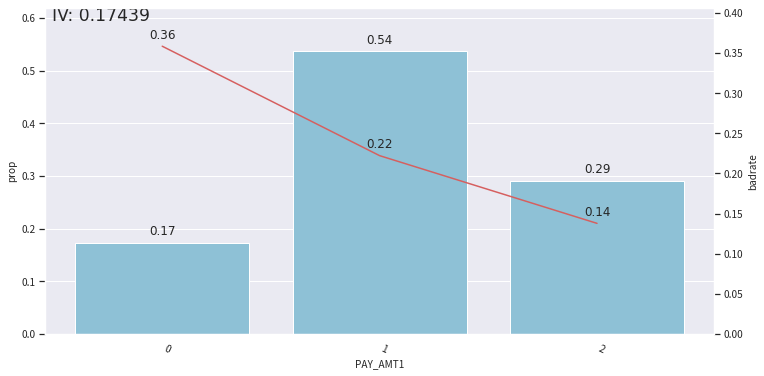

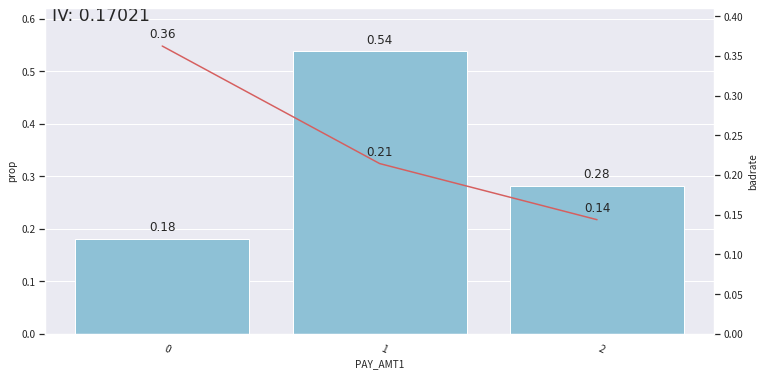

In [19]:
#apply binning
train_selected_bin = combiner.transform(train_selected)
test_bin = combiner.transform(test[train_selected_bin.columns])

#Fine tune bins
from toad.plot import  bin_plot,badrate_plot
bin_plot(train_selected_bin,x='PAY_AMT1',target='label')
bin_plot(test_bin,x='PAY_AMT1',target='label')

In [20]:
train_selected_bin.head().reset_index(drop=True)

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,27351,5,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,22030,7,0,1,2,1,2,2,2,2,...,2,2,2,2,2,1,3,3,4,0
2,22167,5,0,1,1,1,3,1,1,1,...,0,0,0,1,0,1,1,1,1,0
3,1881,3,1,2,2,1,2,2,2,2,...,2,3,3,1,1,2,2,2,1,0
4,1320,6,0,3,1,1,1,2,2,1,...,2,1,1,2,2,0,3,4,3,0


#*4.TRANSFORM TO WOE AND CALCULATE PSI*

##Transform to WOE (Weight of Evidence)
Weight of evidence (WOE) and Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection. These concepts have huge connection with the logistic regression modeling technique. It is widely used in credit scoring to measure the separation of good vs bad customers.

Langkah-langkah dalam menghitung WOE adalah sebagai berikut:

1. Membagi variabel independen ke dalam beberapa interval atau bin
2. Menghitung jumlah orang dalam masing-masing interval yang termasuk dalam kelas target dan non-target
3. Menghitung proporsi kelas target dan non-target dalam masing-masing interval
4. Menghitung rasio antara proporsi kelas target dan non-target dalam setiap interval, yaitu Odds Ratio
5. Menghitung WOE sebagai logaritma natural dari rasio odds di interval yang bersangkutan dibagi dengan rasio odds dari seluruh populasi
6. Menggunakan nilai WOE untuk menghitung skor kredit atau membuat model risiko kredit

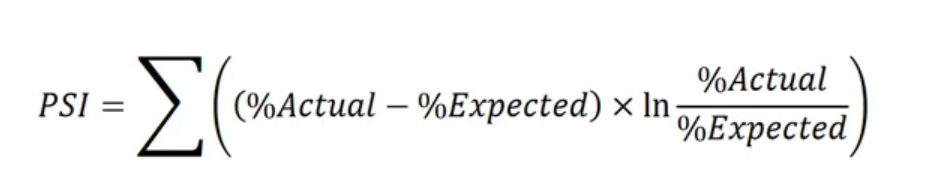

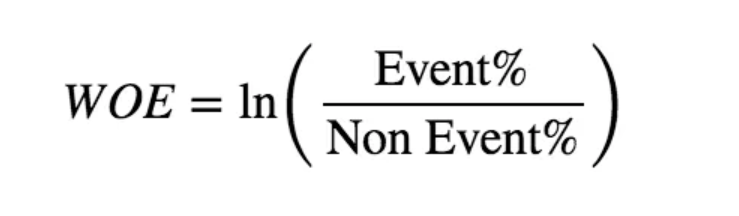

In [21]:
##transform to WOE
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=train_selected_bin,
                            y=train_selected_bin['label'], 
                            exclude=exclude_list)
#transform testing set
test_woe = t.transform(test_bin)

final_data_woe = pd.concat([train_woe,test_woe]).reset_index(drop=True)
final_data_woe.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,27351,-0.275266,-0.169523,-0.128118,-0.332813,-0.401834,-0.426541,-0.220744,-0.187514,-0.148030,...,0.005129,0.018411,0.008164,0.005232,0.562737,0.512424,0.448057,0.373100,0.353873,1
1,22030,-0.550862,-0.169523,-0.128118,-0.664960,-0.401834,-0.290711,-0.227576,-0.203455,-0.197251,...,0.088956,0.192416,0.219860,-0.575671,-0.584325,0.073524,-0.491981,-0.347596,-0.637213,0
2,22167,-0.275266,-0.169523,-0.128118,-0.332813,-0.401834,1.362173,-0.400243,-0.344979,-0.329680,...,0.005129,0.018411,0.008164,0.005232,0.562737,0.073524,0.059342,0.085302,0.086754,0
3,1881,0.217592,0.086064,-0.049992,-0.664960,-0.401834,-0.290711,-0.227576,-0.203455,-0.197251,...,0.088956,-0.078859,-0.065390,0.005232,0.015078,-0.054408,-0.092085,-0.073234,0.086754,0
4,1320,-0.388823,-0.169523,0.002828,-0.332813,-0.401834,-0.426541,-0.227576,-0.203455,-0.329680,...,0.088956,-0.209855,-0.185193,-0.575671,-0.584325,0.512424,-0.491981,-0.669533,-0.280111,0


## Calculate PSI (Population Stability Index)
WOE dan PSI dapat digunakan bersama-sama untuk melihat pengaruh antara feature dengan label dan memastikan model kredit tetap stabil dan akurat dari waktu ke waktu
The industry level is to drop features with a PSI greater than 0.2


In [22]:
#get the feature name
features_list = [feat for feat in train_woe.columns if feat not in exclude_list]
#calculate PSI using toad
psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values(0)
#put into a dataframe
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index' : 'feature',0:'psi'})

# features less than 0.25
psi005 = list(psi_df[psi_df.psi<0.25].feature)
# features geater than 0.25
psi_remove = list(psi_df[psi_df.psi>=0.25].feature)

# keep exclude list
for i in exclude_list:
    if i in psi005:
        pass
    else:
       psi005.append(i) 
# remove features that are geater than 0.25
train_selected_woe_psi = train_woe[psi005]
off_woe_psi = test_woe[psi005]

# output our final data table
final_data_woe = pd.concat([train_selected_woe_psi,off_woe_psi]).reset_index(drop=True)
final_data_woe.head()

<ipython-input-22-e1e60b426016>:4: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values(0)


,EDUCATION,PAY_3,PAY_2,BILL_AMT4,BILL_AMT1,PAY_4,PAY_6,BILL_AMT2,PAY_5,PAY_0,...,PAY_AMT4,PAY_AMT2,PAY_AMT1,PAY_AMT3,PAY_AMT6,BILL_AMT5,AGE,LIMIT_BAL,ID,label
0,-0.169523,-0.426541,-0.401834,0.005129,0.074102,-0.220744,-0.148030,-0.016434,-0.187514,-0.332813,...,0.448057,0.562737,0.005232,0.512424,0.353873,0.018411,-0.128118,-0.275266,27351,1
1,-0.169523,-0.290711,-0.401834,0.088956,-0.021881,-0.227576,-0.197251,-0.074498,-0.203455,-0.664960,...,-0.491981,-0.584325,-0.575671,0.073524,-0.637213,0.192416,-0.128118,-0.550862,22030,0
2,-0.169523,1.362173,-0.401834,0.005129,0.074102,-0.400243,-0.329680,-0.016434,-0.344979,-0.332813,...,0.059342,0.562737,0.005232,0.073524,0.086754,0.018411,-0.128118,-0.275266,22167,0
3,0.086064,-0.290711,-0.401834,0.088956,-0.021881,-0.227576,-0.197251,-0.074498,-0.203455,-0.664960,...,-0.092085,0.015078,0.005232,-0.054408,0.086754,-0.078859,-0.049992,0.217592,1881,0
4,-0.169523,-0.426541,-0.401834,0.088956,-0.021881,-0.227576,-0.329680,-0.016434,-0.203455,-0.332813,...,-0.491981,-0.584325,-0.575671,0.512424,-0.280111,-0.209855,0.002828,-0.388823,1320,0


In [23]:
psi_df

,feature,psi
0,EDUCATION,0.000005
1,PAY_3,0.000020
2,PAY_2,0.000033
3,BILL_AMT4,0.000075
4,BILL_AMT1,0.000112
5,PAY_4,0.000150
6,PAY_6,0.000171
7,BILL_AMT2,0.000216
8,PAY_5,0.000315
9,PAY_0,0.000323


#**5. OUTPUT FINAL IV**

In [24]:
# output the IV
features_use = [feat for feat in final_data_woe.columns if feat not in exclude_list]
len(features_use)

df_iv=output_iv_importance(final_data_woe[features_use+['label']],'label')
df_iv

,feature,iv
0,PAY_0,0.873565
1,PAY_2,0.546857
2,PAY_3,0.412220
3,PAY_4,0.359289
4,PAY_5,0.333734
5,PAY_6,0.285164
6,LIMIT_BAL,0.182110
7,PAY_AMT1,0.173018
8,PAY_AMT2,0.141681
9,PAY_AMT3,0.126965


In [25]:

import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd

# Get the IV and PSI values into a DataFrame
iv_df = df_iv[['feature', 'iv']].set_index('feature')
psi_df = psi_df[['feature', 'psi']].set_index('feature')

# Merge IV and PSI DataFrames
iv_psi_df = iv_df.merge(psi_df, left_index=True, right_index=True)

# Round IV and PSI values to 4 decimal places
iv_psi_df['iv'] = iv_psi_df['iv'].round(4)
iv_psi_df['psi'] = iv_psi_df['psi'].round(4)


# Sort DataFrame by IV value in descending order
iv_psi_df.sort_values(by='iv', ascending=False, inplace=True)

# Create bar chart trace
bar_trace = go.Bar(x=iv_psi_df.index, y=iv_psi_df.iv,
                   name='iv', marker=dict(line_color='red'))


# Create table using plotly
table = go.Table(
    header=dict(values=['<b>Features</b>', '<b>IV</b>', '<b>PSI</b>'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[iv_psi_df.index, iv_psi_df.iv, iv_psi_df.psi],
               fill_color='lavender',
               align='left'))



# Set layout and display the table
layout = dict(title='<b>IV and PSI values for each feature</b>', height=800,width=400)

fig = dict(data=[table], layout=layout)
pyo.iplot(fig)


#**6. MODEL TUNNING**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Pisahkan atribut dan label pada dataset
x = data.drop('label', axis=1)
y = data['label']



# Bagi data menjadi data latih dan data uji dengan proporsi label yang sama
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Tampilkan proporsi label pada data train dan data test
print("Proporsi label pada data train:")
print(y_train.value_counts(normalize=True))

print("Proporsi label pada data test:")
print(y_test.value_counts(normalize=True))


Proporsi label pada data train:
0    0.7788
1    0.2212
Name: label, dtype: float64
Proporsi label pada data test:
0    0.7788
1    0.2212
Name: label, dtype: float64


## Logistic Regression

Logistic regression adalah salah satu teknik analisis regresi yang digunakan untuk memprediksi variabel kategori (biner) 
Tujuannya untuk menemukan hubungan antara variabel prediktor dan variabel target, yang dinyatakan dalam bentuk probabilitas.

In [27]:
import matplotlib.pyplot as plt
from toad.metrics import KS, AUC
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report

def check_train_test_auc(x_train,y_train,x_test,y_test):
    lr = LogisticRegression(class_weight='balanced', random_state=42, C=0.1, penalty='l2', solver='newton-cg')
    lr.fit(x_train, y_train)

    pred_train = lr.predict_proba(x_train)[:,1]
    print('train KS',KS(pred_train, y_train))
    print('train AUC',AUC(pred_train, y_train))
    
    pred_OOT =lr.predict_proba(x_test)[:,1]
    print('Test KS',KS(pred_OOT, y_test))
    print('Test AUC',AUC(pred_OOT, y_test))

    # fig, ax = plt.subplots(figsize=(12, 8))
    # plot_roc_curve(lr, x_test, y_test, color='blue', ax=ax)

#train & test
check_train_test_auc(x_train=train_woe[features_use], y_train=train_woe['label'],
                     x_test=test_woe[features_use], y_test=test_woe['label'])


train KS 0.41622258485592534
train AUC 0.7744294874381409
Test KS 0.4022683078679646
Test AUC 0.7637592091571924


## Gradient Boosting Decision Trees (GBDT)

model pembelajaran mesin yang menggunakan serangkaian Decision Tree untuk melakukan prediksi. 
Model ini menggabungkan teknik ensemble learning dan boosting untuk meningkatkan akurasi prediksi. Dalam GBDT, setiap Decision Tree dibangun secara berurutan, dengan setiap pohon yang baru dibangun berfokus pada kesalahan yang dihasilkan oleh pohon sebelumnya.

True Positive： 609
True Negative： 5526
False Positive： 315
False Negative： 1050
accuracy:  0.818
（recall）:  0.3670886075949367
（precision）:  0.6590909090909091
F1 score:  0.47154471544715443
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.66      0.37      0.47      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

balanced_accuracy_score:  0.6565797429346024


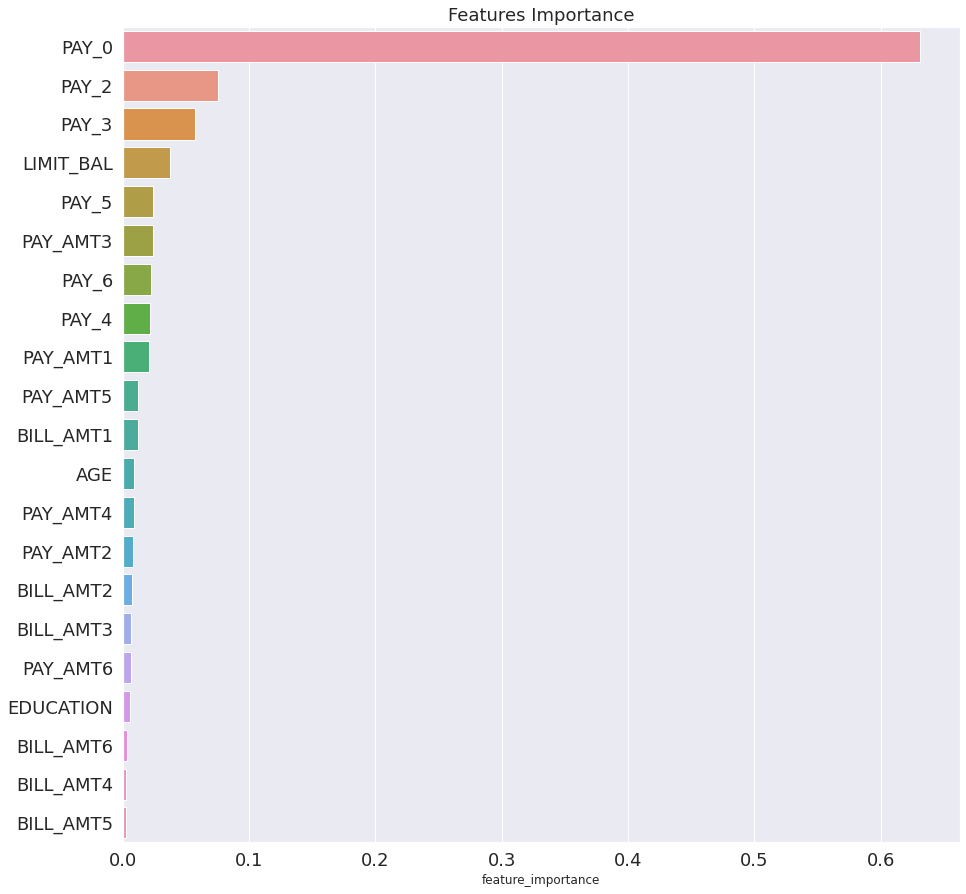

In [28]:
def get_evaluation_scores(label, predictions):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    from sklearn.metrics import balanced_accuracy_score
    tp, fn, fp, tn = confusion_matrix(label,predictions,labels=[1,0]).reshape(-1)
    print('True Positive：',tp)
    print('True Negative：',tn)
    print('False Positive：',fp)
    print('False Negative：',fn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    print('accuracy: ',accuracy)
    recall = tp/(tp+fn)
    print('（recall）: ',recall)
    precision = tp/(tp+fp)
    print('（precision）: ',precision)
    #f1 score = 2*(P*R)/(P+R)
    f1 = 2*precision*recall/(precision+recall)
    print('F1 score: ',f1)
    
    print(classification_report(label, predictions))
    
    print('balanced_accuracy_score: ',balanced_accuracy_score(label,predictions))
    return precision, recall

def evaluate_result(df_train,df_test,features_name):
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
    import seaborn as sns
    import matplotlib.pyplot as plt
    start = time.time()
    x_train = df_train[features_name]
    y_train = df_train['label']

    x_test  = df_test[features_name]
    y_test  = df_test['label']

    model = GradientBoostingClassifier(n_estimators=250,random_state=0)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    get_evaluation_scores(label = y_test, predictions=predictions)
    feat_importances = pd.Series(model.feature_importances_, index=features_name)
    feat_importances=pd.DataFrame(feat_importances).reset_index()
    feat_importances.columns=['feature_name','feature_importance']
    feat_importances=feat_importances.sort_values(['feature_importance'],ascending=False)
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,15))

    # sns_plot1=sns.barplot(feat_importances.feature_importance,feat_importances.feature_name,estimator=sum)
    sns_plot1=sns.barplot(x=feat_importances.feature_importance, y=feat_importances.feature_name, estimator=sum)
    plt.title('Features Importance',size=18)
    plt.ylabel('', size = 15)
    plt.tick_params(labelsize=18)
    return feat_importances,model,x_train,y_train,x_test,y_test

fet_importance_GBDT_reason,model,x_train,y_train,x_test,y_test = evaluate_result(df_train=train_woe,
                df_test=test_woe,
                features_name=features_use)

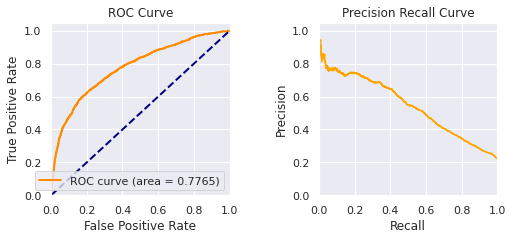

In [29]:
def plot_roc_pre_recall_curve(labels, probs):
    from sklearn.metrics import precision_recall_curve
    # Get ROC curve FPR and TPR from true labels vs score values
    fpr, tpr, _ = roc_curve(labels, probs)

    # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
    roc_auc = auc(fpr, tpr)

    # Calculate precision and recall from true labels vs score values
    precision, recall, _ = precision_recall_curve(labels, probs)

    plt.figure(figsize=(8, 3))

    plt.subplot(1,2,1)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.step(recall, precision, color='orange', where='post')
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.grid(True)

    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure 
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.5   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show()

probs = model.predict_proba(x_test)[:,1]
sns.set(font_scale = 1)
plot_roc_pre_recall_curve(y_test, probs)

#**7. MODEL PRODUCTION**

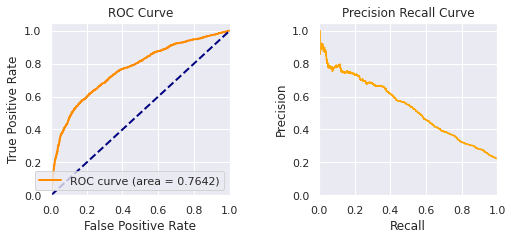

In [30]:
#prepare train & test data
x_train = train_woe[features_use]
y_train=train_woe['label']
x_test =test_woe[features_use] 
y_test = test_woe['label']

#Train LR
#lr = LogisticRegression(random_state=42,C= 0.1, penalty='l2', solver='newton-cg')
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)

#check AUC
probs = lr.predict_proba(x_test)[:,1]
sns.set(font_scale = 1)
plot_roc_pre_recall_curve(y_test, probs)

In [31]:
# AUC of LR: 0.7642
# AUC of GBDT: 0.7765

#**8. SCORECARD TUNING**

In [32]:
# scorecard tuning
card = toad.ScoreCard(
    combiner = combiner,
    transer = t,
    class_weight = 'balanced',
    C=0.1,
    base_score = 1000,
    base_odds = 35 ,
    pdo = 80,
    rate = 2
)

card.fit(train_woe[features_use], train_woe['label'])

#inference on test data
test['CreditScore'] = card.predict(test)
test['CreditScore'].describe()

#output the scorecard
final_card_score=card.export()
len(final_card_score)

#transform the scorecard into dataframe and save to csv
keys = list(card.export().keys())
score_card_df = pd.DataFrame()
for n in keys:
    temp = pd.DataFrame.from_dict(final_card_score[n], orient='index')
    temp = temp.reset_index()
    temp.columns= ['binning','score']
    temp['variable'] = n
    temp = temp[['variable','binning','score']]
    score_card_df=score_card_df.append(temp)
score_card_df.head(30)

<ipython-input-32-9d1a02814285>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-32-9d1a02814285>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-32-9d1a02814285>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-32-9d1a02814285>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-32-9d1a02814285>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-32-9d1a02814285>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,variable,binning,score
0,EDUCATION,[-inf ~ 2),28.88
1,EDUCATION,[2 ~ inf),27.59
0,PAY_3,[-inf ~ -1),34.79
1,PAY_3,[-1 ~ 0),39.10
2,PAY_3,[0 ~ 1),35.57
3,PAY_3,[1 ~ inf),-7.34
0,PAY_2,[-inf ~ -1),29.73
1,PAY_2,[-1 ~ 2),30.56
2,PAY_2,[2 ~ inf),18.47
0,BILL_AMT4,[-inf ~ 2400.0),28.19


#**9. DISTRIBUTIO ANALYSIS**

In [33]:
test=test.sort_values(by = 'ID').reset_index(drop=True)
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label,CreditScore
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,550.377731
1,12,260000.0,2,1,2,51,-1,-1,-1,-1,...,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,680.116966
2,15,250000.0,1,1,2,29,0,0,0,0,...,56875.0,55512.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,0,691.636794
3,18,320000.0,1,1,1,49,0,0,0,-1,...,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0,758.361272
4,21,130000.0,2,3,2,39,0,0,0,0,...,11802.0,930.0,3000.0,1537.0,1000.0,2000.0,930.0,33764.0,0,691.163628


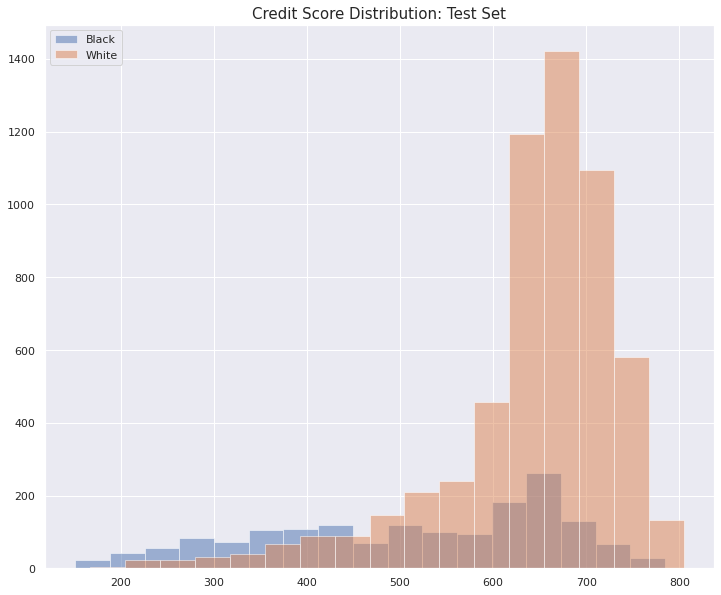

In [34]:
plt.figure(figsize=(12,10))
import random
import numpy
from matplotlib import pyplot as plt

w = 40
n = math.ceil((test['CreditScore'].max() - test['CreditScore'].min())/w)
#bins = numpy.linspace(-10, 10, 100)

plt.hist(test[test.label==1].CreditScore, alpha=0.5, label='Black',bins = n)
plt.hist(test[test.label==0].CreditScore, alpha=0.5, label='White',bins = n)
plt.legend(loc='upper left')
plt.title('Credit Score Distribution: Test Set',size=15)
plt.show()

#**10. THRESHOLD TUNING**

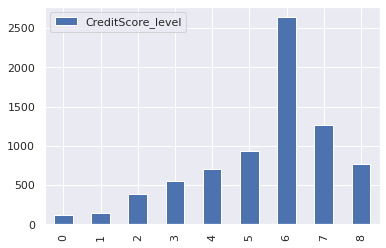

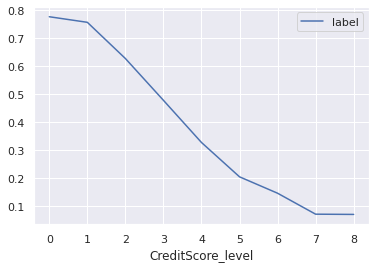

In [35]:
def get_credit_level(
    test,
    target_score ='order_score',
    out_col = 'order_level',
    left_bound = -100,
    level_0 = 100,
    level_1 = 200,    
    level_2 = 250,    
    level_3 = 300,    
    level_4 = 350,    
    level_5 = 400,    
    level_6 = 450,
    level_7 = 500,
    level_8 = 800):
    level = []
    for i in range(len(test)):
        if (test[target_score][i]>left_bound) & (test[target_score][i]<=level_0):
            level.append(0)
        elif  (test[target_score][i]>level_0) & (test[target_score][i]<=level_1):
            level.append(1)
        elif  (test[target_score][i]>level_1) & (test[target_score][i]<=level_2):
            level.append(2)
        elif  (test[target_score][i]>level_2) & (test[target_score][i]<=level_3):
            level.append(3)
        elif  (test[target_score][i]>level_3) & (test[target_score][i]<=level_4):
            level.append(4)
        elif  (test[target_score][i]>level_4) & (test[target_score][i]<=level_5):
            level.append(5)
        elif  (test[target_score][i]>level_5) & (test[target_score][i]<=level_6):
            level.append(6)
        elif  (test[target_score][i]>level_6) & (test[target_score][i]<=level_7):
            level.append(7)
        elif  (test[target_score][i]>level_7 )& (test[target_score][i]<=level_8):
            level.append(8)
        
    test[out_col] = level
    return test

def plot_bts_level_loss(test, target_col):
    bts_level_df = test[target_col].value_counts()
    bts_level_df=pd.DataFrame(bts_level_df)
    df_label_level= test[test.label==1].groupby(target_col)['label'].count()/ test.groupby(target_col)['label'].count()
    df_label_level = pd.DataFrame(df_label_level)
    bts_level_df.sort_index().plot.bar(title='')
    df_label_level.plot()

test = get_credit_level(test,
                       target_score ='CreditScore',
                       out_col = 'CreditScore_level',
                      left_bound = -1000,
    level_0 = 250,
    level_1 = 300,    
    level_2 = 400,    
    level_3 = 500,    
    level_4 = 580,    
    level_5 = 630,    
    level_6 = 690,
    level_7 = 730,
    level_8 = 1000
                )
plot_bts_level_loss(test,target_col='CreditScore_level')
def get_loss_coverage(test,target_level):

    L0_loss = test[test[target_level]>=0 ].label.value_counts()/len(test[test[target_level]>=0 ])
    L0_coverage=test[test[target_level]>=0 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 0: Loss is ",L0_loss[1], "; Coverage is ",L0_coverage)

    L1_loss = test[test[target_level]>=1 ].label.value_counts()/len(test[test[target_level]>=1 ])
    L1_coverage=test[test[target_level]>=1 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 1: Loss is ",L1_loss[1], "; Coverage is ",L1_coverage)

    L2_loss = test[test[target_level]>=2 ].label.value_counts()/len(test[test[target_level]>=2 ])
    L2_coverage=test[test[target_level]>=2 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 2: Loss is ",L2_loss[1], "; Coverage is ",L2_coverage)

    L3_loss = test[test[target_level]>=3 ].label.value_counts()/len(test[test[target_level]>=3 ])
    L3_coverage=test[test[target_level]>=3 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 3: Loss is ",L3_loss[1], "; Coverage is ",L3_coverage)

    L4_loss = test[test[target_level]>=4 ].label.value_counts()/len(test[test[target_level]>=4 ])
    L4_coverage=test[test[target_level]>=4 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 4: Loss is ",L4_loss[1], "; Coverage is ",L4_coverage)


    #level 5-Level 8 Loss (percentage of default people)
    L5_loss = test[test[target_level]>=5 ].label.value_counts()/len(test[test[target_level]>=5 ])
    #level 5- level 8 Coverage (percentage of good people)
    L5_coverage=test[test[target_level]>=5 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 5: Loss is ",L5_loss[1], "; Coverage is ",L5_coverage)
    #level 6-level 8 Loss
    L6_loss=test[test[target_level]>=6 ].label.value_counts()/len(test[test[target_level]>=6 ])
    #level 6-level 8 Coverage
    L6_coverage=test[test[target_level]>=6].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 6: Loss is ",L6_loss[1], "; Coverage is ",L6_coverage)


    L7_loss = test[test[target_level]>=7 ].label.value_counts()/len(test[test[target_level]>=7 ])
    L7_coverage=test[test[target_level]>=7 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 7: Loss is ",L7_loss[1], "; Coverage is ",L7_coverage)

    L8_loss = test[test[target_level]>=8 ].label.value_counts()/len(test[test[target_level]>=8 ])
    L8_coverage=test[test[target_level]>=8 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 8: Loss is ",L8_loss[1], "; Coverage is ",L8_coverage)

In [36]:
get_loss_coverage(test,target_level='CreditScore_level')

Level 0: Loss is  0.2212 ; Coverage is  1.0
Level 1: Loss is  0.21208835885621358 ; Coverage is  0.9953775038520801
Level 2: Loss is  0.20124395300621978 ; Coverage is  0.9893853792158877
Level 3: Loss is  0.1773463727922931 ; Coverage is  0.9649032699880158
Level 4: Loss is  0.150976345451659 ; Coverage is  0.9155966444102037
Level 5: Loss is  0.12892857142857142 ; Coverage is  0.8351309707241911
Level 6: Loss is  0.11366073343341197 ; Coverage is  0.7075843177538093
Level 7: Loss is  0.07111111111111111 ; Coverage is  0.3220338983050847
Level 8: Loss is  0.07058823529411765 ; Coverage is  0.12172573189522343


In [53]:
test.to_excel('hasil_output.xlsx', index=False)

In [42]:
test.iloc[0,:]

ID                        2.000000
LIMIT_BAL            120000.000000
SEX                       2.000000
EDUCATION                 2.000000
MARRIAGE                  2.000000
AGE                      26.000000
PAY_0                    -1.000000
PAY_2                     2.000000
PAY_3                     0.000000
PAY_4                     0.000000
PAY_5                     0.000000
PAY_6                     2.000000
BILL_AMT1              2682.000000
BILL_AMT2              1725.000000
BILL_AMT3              2682.000000
BILL_AMT4              3272.000000
BILL_AMT5              3455.000000
BILL_AMT6              3261.000000
PAY_AMT1                  0.000000
PAY_AMT2               1000.000000
PAY_AMT3               1000.000000
PAY_AMT4               1000.000000
PAY_AMT5                  0.000000
PAY_AMT6               2000.000000
label                     1.000000
CreditScore             550.377731
CreditScore_level         4.000000
Name: 0, dtype: float64

# KESIMPULAN
1. Nasabah terbanyak ada pada level 6 sebesar 35.12% dengan category Good Credit

2. Good Customer tertinggi: pada Level 6, 7, 5 dengan masing-masing rate (38.57%, 20.05%, 13.11%)

3. Default_Rate tertinggi: pada level 6, 3, 2, dengan masing-masing rate (22.97%, 15.79%, 14.77%)

4. Secara keseluruhan, jika kita memberikan top up limit maka kita akan mengalami kerugian sebesar 22.12%

5. Hanya saja perlu diperhatikan kembali pada level 6 (Good Category) tapi menyumbang kerugian tertinggi. Berarti ada feature yang berpengaruh tinggi yang tidak masuk pada data history customer .kita perlu menambahkan beberapa feature Kembali pada data set selanjutnya



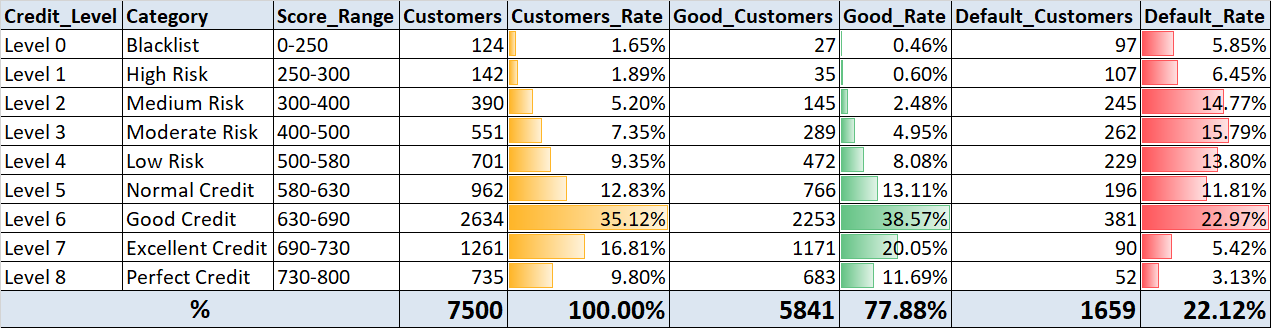